In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('updated_NSCH_Vision_Health_Data.csv')

# Display the first few rows of the dataset
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Topic,Category,Question,Response,Age,Gender,RaceEthnicity,Data_Value_Unit,Data_Value,Sample_Size
0,2016,2017,US,National,Service Utilization,Need,Percentage of children who needed vision care ...,Yes,0-17 years,All genders,All races,%,24.46,1639.0
1,2016,2017,FL,Florida,Service Utilization,Provider Type,Percentage of children who have ever had their...,Clinic,0-17 years,Male,"White, non-Hispanic",%,0.00,251.0
2,2016,2017,MO,Missouri,Visual Function,Blind or Difficulty Seeing,Percentage of children who are blind or have p...,Yes,0-17 years,Male,"Hispanic, any race",%,0.00,44.0
3,2016,2017,US,National,Service Utilization,Provider Type,Percentage of children who have ever had their...,Eye doctor or eye specialist,0-17 years,All genders,"Black, non-Hispanic",%,56.13,3171.0
4,2016,2017,VT,Vermont,Service Utilization,Provider Type,Percentage of children who have ever had their...,Other,0-17 years,Female,All races,%,0.06,552.0


In [3]:
max_value = df['Sample_Size'].max()
min_value = df['Sample_Size'].min()

print('Max:', max_value, 'Min:', min_value)

Max: 71586.0 Min: 30.0


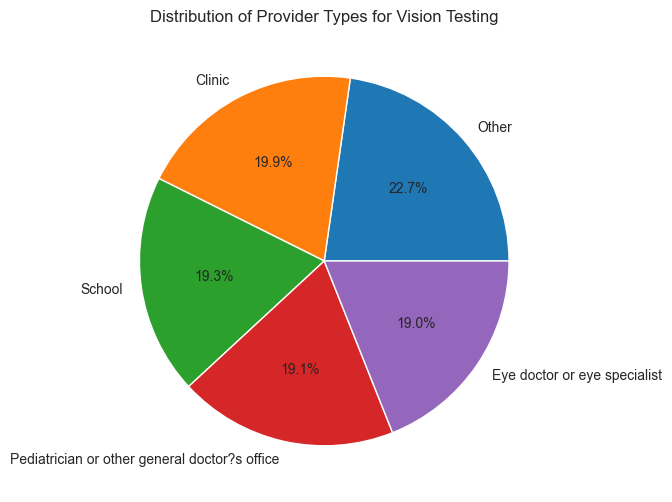

In [4]:
# Analyze provider types for vision testing
provider_types = df[df['Category'] == 'Provider Type']['Response'].value_counts()
plt.figure(figsize=(10, 6))
provider_types.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Provider Types for Vision Testing')
plt.ylabel('')
plt.show()

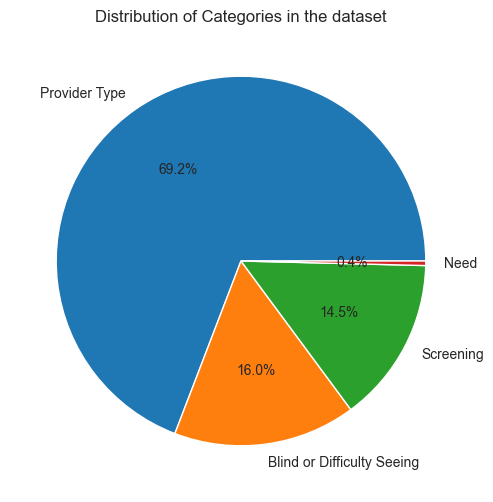

In [5]:
# Analyze Categories
provider_types = df['Category'].value_counts()
plt.figure(figsize=(10, 6))
provider_types.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Categories in the dataset')
plt.ylabel('')
plt.show()

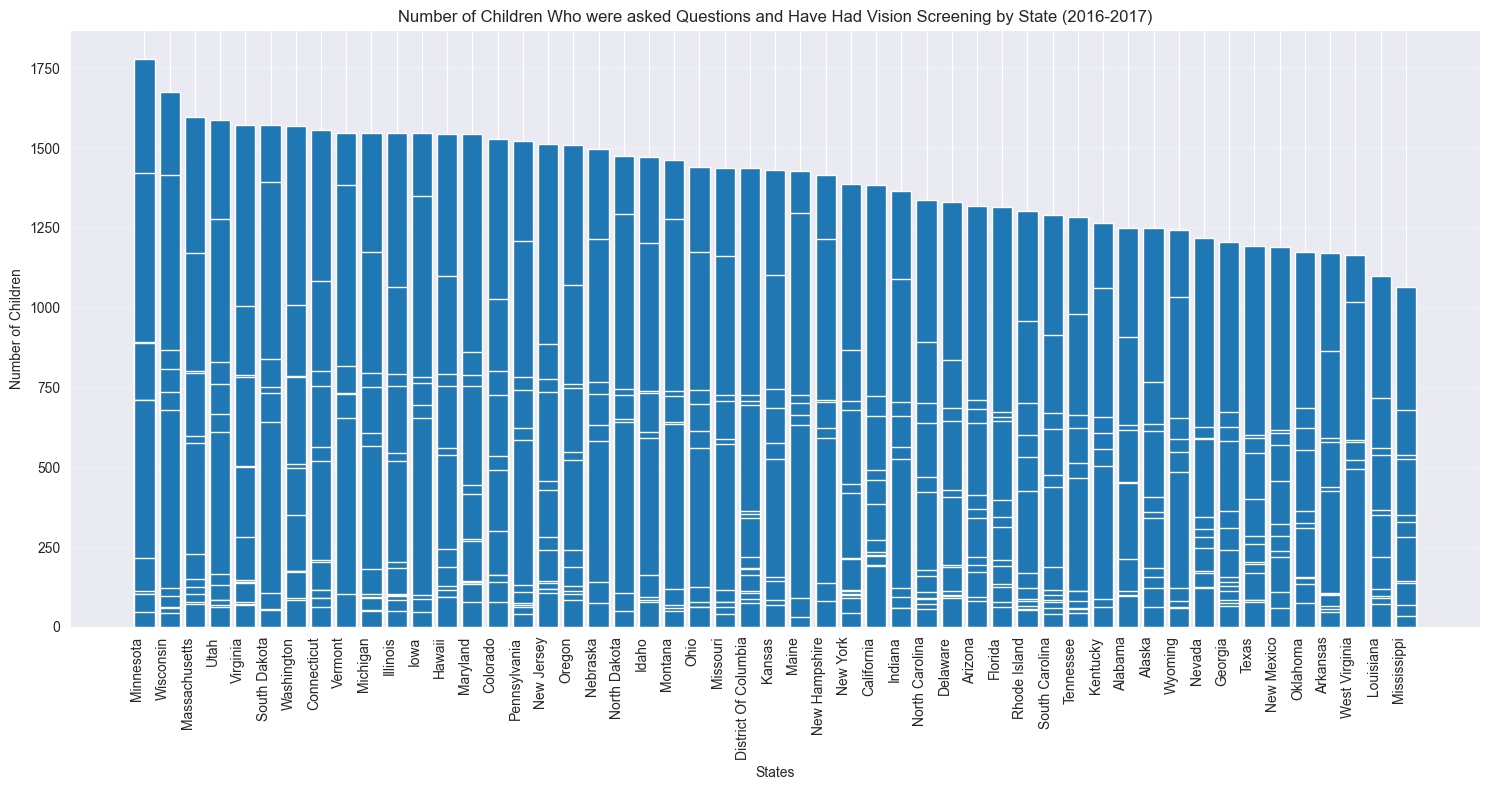

In [6]:
# Filter data for Vision Screening
screening_data = df[(df['Topic'] == 'Service Utilization') &
                    (df['Category'] == 'Screening') &
                    (df['Response'] == 'Yes') &
                    (df['LocationDesc'] != 'National')]

# Sort the data in decreasing order of 'Sample_Size'
screening_data = screening_data.sort_values(by='Sample_Size', ascending=False)

# Create the bar chart
plt.figure(figsize=(15, 8))
bars = plt.bar(screening_data['LocationDesc'], screening_data['Sample_Size'])
plt.title('Number of Children Who were asked Questions and Have Had Vision Screening by State (2016-2017)')
plt.xlabel('States')
plt.ylabel('Number of Children')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

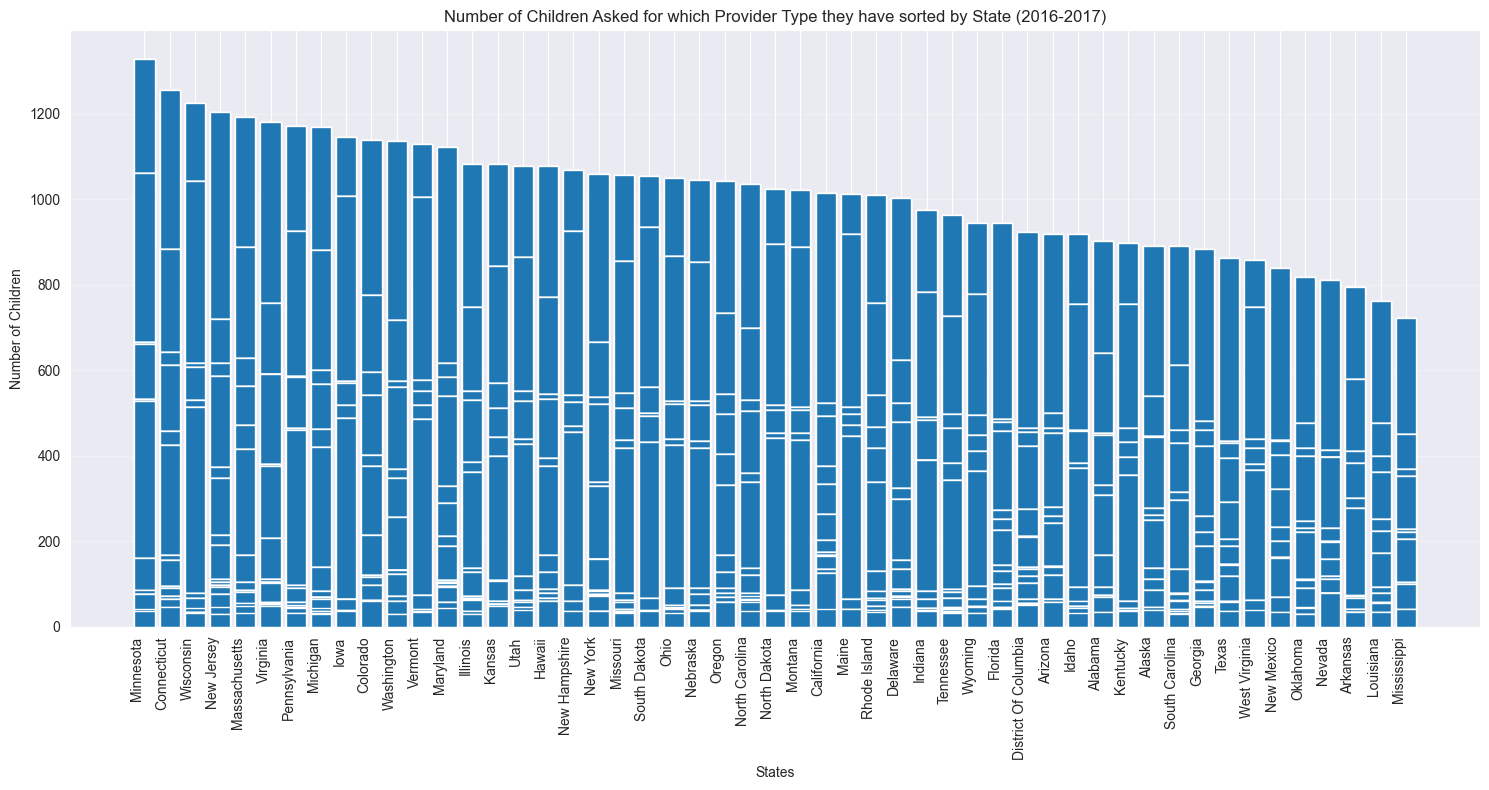

In [7]:
# Filter data for Visual Function
screening_data = df[(df['Topic'] == 'Service Utilization') &
                    (df['Category'] == 'Provider Type') &
                    (df['LocationDesc'] != 'National')]

# Sort the data in decreasing order of 'Sample_Size'
screening_data = screening_data.sort_values(by='Sample_Size', ascending=False)

# Create the bar chart
plt.figure(figsize=(15, 8))
bars = plt.bar(screening_data['LocationDesc'], screening_data['Sample_Size'])
plt.title('Number of Children Asked for which Provider Type they have sorted by State (2016-2017)')
plt.xlabel('States')
plt.ylabel('Number of Children')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

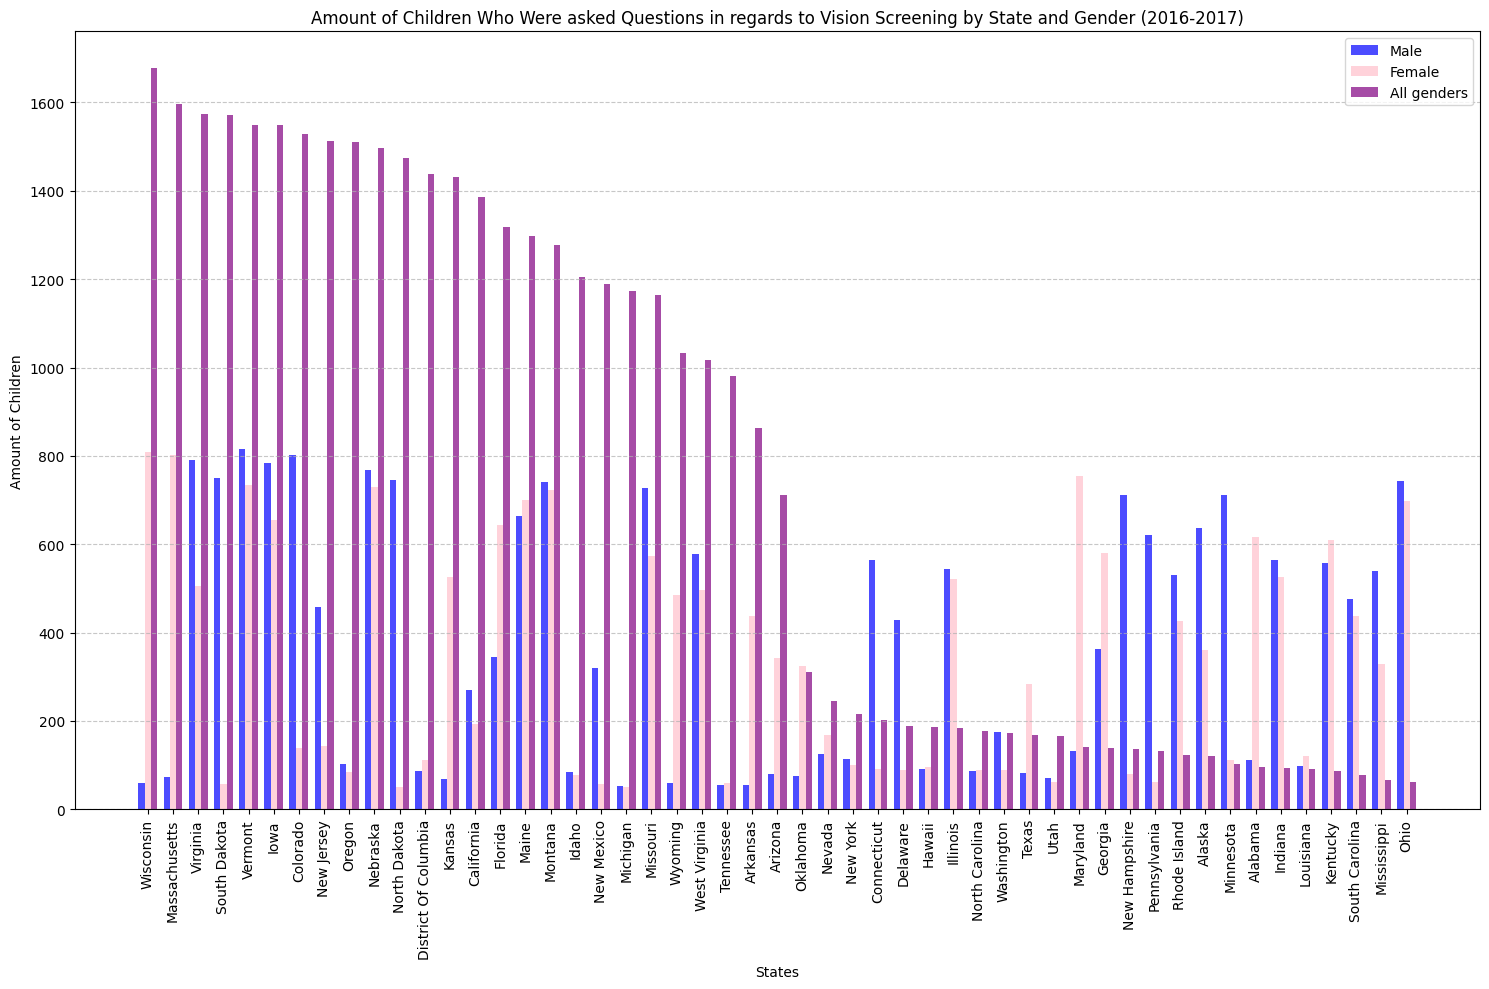

In [9]:
screening_data = df[(df['Topic'] == 'Service Utilization') &
                    (df['Category'] == 'Screening') &
                    (df['Response'] == 'Yes') &
                    (df['LocationDesc'] != 'National') &
                    (df['Gender'].isin(['Male', 'Female', 'All genders']))]


pivot_data = screening_data.pivot_table(values='Sample_Size',
                                        index='LocationDesc',
                                        columns='Gender',
                                        aggfunc='first')

# Sort the data by 'All genders' column
pivot_data = pivot_data.sort_values('All genders', ascending=False)

# Create the bar chart
fig, ax = plt.subplots(figsize=(15, 10))
bar_width = 0.25
index = range(len(pivot_data.index))

ax.bar(index, pivot_data['Male'], bar_width, label='Male', color='blue', alpha=0.7)
ax.bar([i + bar_width for i in index], pivot_data['Female'], bar_width, label='Female', color='pink', alpha=0.7)
ax.bar([i + 2 * bar_width for i in index], pivot_data['All genders'], bar_width, label='All genders', color='purple', alpha=0.7)
ax.set_xlabel('States')
ax.set_ylabel('Amount of Children')
ax.set_title('Amount of Children Who Were asked Questions in regards to Vision Screening by State and Gender (2016-2017)')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(pivot_data.index, rotation=90)

ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

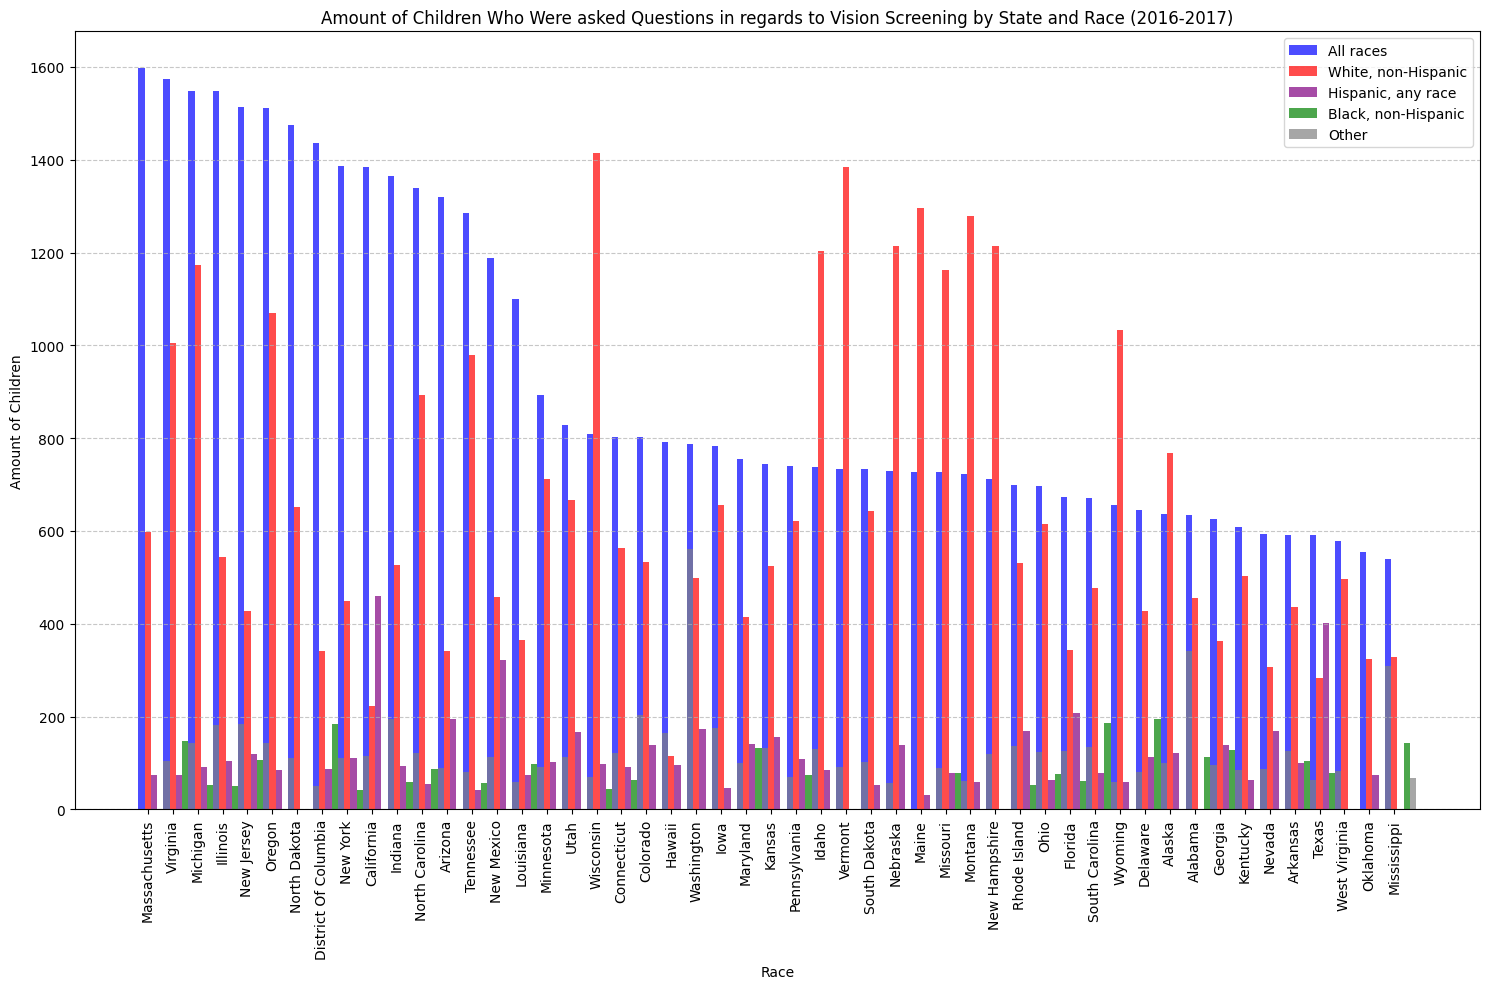

In [23]:
screening_data = df[(df['Topic'] == 'Service Utilization') &
                    (df['Category'] == 'Screening') &
                    (df['Response'] == 'Yes') &
                    (df['LocationDesc'] != 'National') &
                    (df['RaceEthnicity'].isin(['All races', 'White, non-Hispanic', 'Hispanic, any race', 'Black, non-Hispanic', 'Other']))]


pivot_data = screening_data.pivot_table(values='Sample_Size',
                                        index='LocationDesc',
                                        columns='RaceEthnicity',
                                        aggfunc='first')

# Sort the data by 'All genders' column
pivot_data = pivot_data.sort_values('All races', ascending=False)

# Create the bar chart
fig, ax = plt.subplots(figsize=(15, 10))
bar_width = 0.25
index = range(len(pivot_data.index))

ax.bar(index, pivot_data['All races'], bar_width, label='All races', color='blue', alpha=0.7)
ax.bar([i + bar_width for i in index], pivot_data['White, non-Hispanic'], bar_width, label='White, non-Hispanic', color='red', alpha=0.7)
ax.bar([i + 2 * bar_width for i in index], pivot_data['Hispanic, any race'], bar_width, label='Hispanic, any race', color='purple', alpha=0.7)
ax.bar([i + 3 * bar_width for i in index], pivot_data['Black, non-Hispanic'], bar_width, label='Black, non-Hispanic', color='green', alpha=0.7)
ax.bar([i + 4 * bar_width for i in index], pivot_data['Other'], bar_width, label='Other', color='gray', alpha=0.7)
ax.set_xlabel('Race')
ax.set_ylabel('Amount of Children')
ax.set_title('Amount of Children Who Were asked Questions in regards to Vision Screening by State and Race (2016-2017)')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(pivot_data.index, rotation=90)

ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()